# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

from sklearn.metrics import r2_score as r2

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [3]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.52e-06
Time:                        00:04:46   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

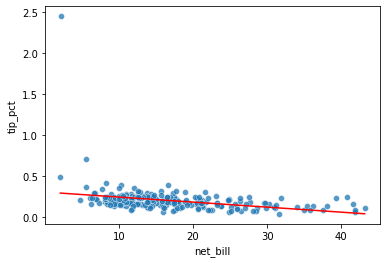

In [4]:
model = reg.fittedvalues
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
sns.lineplot(x ='net_bill', y=model, data=tips, color='r');

In [5]:
def ajuste_model(opcao):
    if opcao == 1:
        reg_ = smf.ols(f'tip_pct ~ np.log(net_bill)', data = tips).fit()
    elif opcao == 2:
        reg_ = smf.ols(f'np.power(tip_pct,2) ~ net_bill,', data = tips).fit()
    elif opcao == 3:
        reg_ = smf.ols(f'np.log(tip_pct) ~ net_bill', data = tips).fit()
    elif opcao == 4:
        reg_ = smf.ols(f'np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
        
    #R2_score = r2(y_true=tips['tip_pct'],y_pred=reg_.fittedvalues)
    
    return reg_ #R2_score
    

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [6]:
reg_1 = smf.ols(f'tip_pct ~ np.log(net_bill)', data = tips).fit()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
reg_2 = smf.ols(f'tip_pct ~ np.power(net_bill,2)', data = tips).fit()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [8]:
reg_3 = smf.ols(f'np.log(tip_pct) ~ net_bill', data = tips).fit()

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.27e-16
Time:                        00:04:47   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

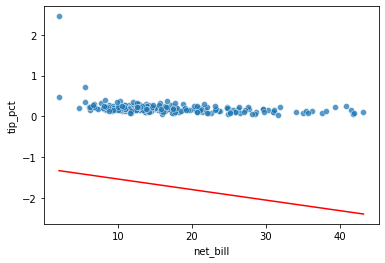

In [11]:
model_3 = reg_3.fittedvalues
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
sns.lineplot(x ='net_bill', y=model_3, data=tips, color='r');

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [9]:
reg_4 = smf.ols(f'np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()

reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           5.20e-20
Time:                        00:04:47   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

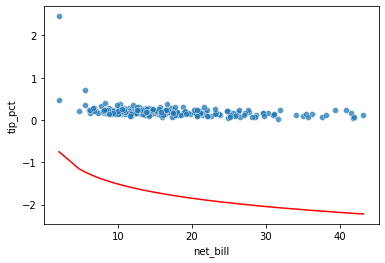

In [10]:
model_4 = reg_4.fittedvalues
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
sns.lineplot(x ='net_bill', y=model_4, data=tips, color='r');

###  6. qual modelo resultou no melhor ajuste?

O segundo. Mas diante destes dois, o primeiro continua sendo o melhor.